# Name: Azizul Kawser
# Student ID: 2207846

## Exercise 1
1) Write a full graph of 20 nodes where from each node, there is a link to one to six other nodes, taken at random, of your choice.Use a labelling of your choice to label each node of the network.  
a) -  Use a visualization tool to display the graph (OK)      
b) -  Use a visualization of your choice to display the nodes each node is linked to  
c) -  Calculate the degree of each node and the average degree of the graph  (use appropriate functions in NetworkX) and display their values  
d) - Test other centrality measures available in NetworkX and display their values, and store the centrality values in a vector  
e) - write a script that randomly removes one edge from the above graph  
- Repeat the process a)-d)  until the number of edges in the graph is equal to one.  
f) repeat e) .. until the number of edges in the graph is one.  
g ) Display a graph showing the variations of the various centrality measures as a function of the number of 
edges in the graph.

In [ ]:
#import required libraries
import networkx as nx
import random
import matplotlib.pyplot as plt

#initialize an empty graph
G = nx.Graph()

# Add 20 nodes with random labels
for i in range(20):
    G.add_node(i, label='Node {}'.format(i))

# Add random edges to each node
for node in G.nodes():
    num_edges = random.randint(1, 6)  # choose random number of edges
    for i in range(num_edges):
        neighbor = random.choice(list(G.nodes()))  # choose random neighbor
        while neighbor == node or G.has_edge(node, neighbor):
            neighbor = random.choice(list(G.nodes()))  # avoid self-loops and duplicates
        G.add_edge(node, neighbor)

In [ ]:
G.nodes(data=True)

### Use a visualization tool to display the graph. Use a visualization of your choice to display the nodes each node is linked to

In [ ]:
# display the graph
nx.draw(G, with_labels = True)
plt.show()

### Calculate the degree of each node and the average degree of the graph  (use appropriate functions in NetworkX) and display their values

In [ ]:
# Calculate the number of edges
print('Number of Edges : ',G.number_of_edges())
# Calculate the number of nodes
print('Number of Nodes : ',G.number_of_nodes())
# show the graph degree
print('Graph degrees:', G.degree())
#calculate the avg degree connectivity
print('Avg degree connectivity: ',nx.average_degree_connectivity(G))

In [ ]:
def analyze_graph(graph):
    print(f'Edges: {graph.number_of_edges()}, Nodes: {graph.number_of_nodes()}')
    print(f'Graph degrees: {graph.degree}')
    print(f'Average degree: {sum(dict(graph.degree()).values()) / len(graph)}')

analyze_graph(G)

### Test other centrality measures available in NetworkX and display their values, and store the centrality values in a vector

In [ ]:
vectors = []
starting_length = len(G.edges)
def vectorize_statistics(graph):
    vector = [sum(dict(graph.degree()).values()) / len(graph), sum(dict(nx.closeness_centrality(graph)).values()) / len(graph), sum(dict(nx.betweenness_centrality(graph)).values())  / len(graph)]
    vectors.append(vector)
    
vectorize_statistics(G)

In [ ]:
print(vectors)

In [ ]:
deg_centrality = nx.degree_centrality(G)

print(sum(deg_centrality.values()) / len(deg_centrality))
print(deg_centrality)

### write a script that randomly removes one edge from the above graph Repeat the process a)-d)  until the number of edges in the graph is equal to one.

In [ ]:
# Define a function that randomly removes one edge from the graph
def remove_edge(G):
    """
    removes edges from the graph and then draws the graph and Calculate the degree of each node, 
    average degree of the graph and centrality measures .
    """
    edges = list(G.edges())
    #create random choice of edges
    edge_to_remove = random.choice(edges)
    #remove the edge
    G.remove_edge(*edge_to_remove)
    #display the graph
    nx.draw(G, with_labels = True)
    plt.show()
    # Calculate the degree of each node
    print("The degree of each node is: ",G.degree())
    # Calculate the average degree of the graph
    avg_degree = nx.average_degree_connectivity(G)
    print('The average degree of the graph is ',avg_degree)
    deg_centrality = nx.degree_centrality(G)
    print('The degree of centrality:',deg_centrality)

In [ ]:
n = G.number_of_edges()
for i in range(n-1):
    remove_edge(G)

# Task 2

Use the provided dataset karate_club_coords.pkl   

  a) write a program that input the above dataset   
  b) write a program that displays the network associated to this dataset  
  c) calculate the density of each node and store them in an array vector  
  d) display the nodes with the highest and smallest density value  
  e) display the network of the graph containing only nodes whose density is higher than the average density of 
      the graph  
 f) calculate the various centrality measures of the newly generated graph  

a) write a program that input the dataset 

In [57]:
import pickle
# Open the file for reading
with open('karate_club_coords.pkl', 'rb') as f:
    # Load the object from the file
    my_object = pickle.load(f, encoding='latin1')
# Use the object as needed
print(my_object)

{'24': array([257.87969408, 318.49368742]), '25': array([446.11750059,  73.11363804]), '26': array([490.53962023, 151.34941744]), '27': array([310.9937593 , 316.88400474]), '20': array([231.27467138, 268.3554436 ]), '21': array([446.60109522, 386.22347982]), '22': array([411.12965804,  53.253833  ]), '23': array([500.        , 269.52685069]), '28': array([472.79527229, 110.9020759 ]), '29': array([149.03975494, 446.03988462]), '1': array([ 69.97107594, 159.0111701 ]), '3': array([157.90050621,   4.23543315]), '2': array([ 96.8218241 , 237.14728561]), '5': array([ 22.29884097, 325.62733401]), '4': array([121.2112242, 275.3350923]), '7': array([125.53235717,  25.74222818]), '6': array([152.65129782, 154.80775364]), '9': array([ 61.083021  , 394.28922573]), '8': array([208.45409923, 139.01263619]), '11': array([  4.99817603, 197.83222394]), '10': array([271.622609  , 400.39798242]), '13': array([183.36024879, 250.69609714]), '12': array([ 23.49922324, 146.13161611]), '15': array([351.3978

b) write a program that displays the network associated to this dataset

Node Degree
1 16
2 9
3 10
4 6
5 3
6 4
7 4
8 4
9 5
10 2
11 3
12 1
13 2
14 5
15 2
16 2
17 2
18 2
19 2
20 3
21 2
22 2
23 2
24 5
25 3
26 3
27 2
28 4
29 3
30 4
31 4
32 6
33 12
34 17


<function matplotlib.pyplot.show(close=None, block=None)>

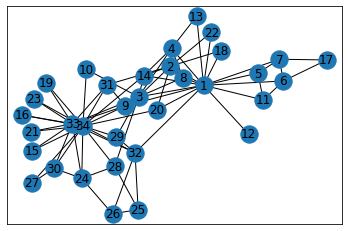

In [61]:
G = nx.karate_club_graph()
G1 = nx.convert_node_labels_to_integers(G, first_label=1)
G1 = nx.relabel_nodes(G1, lambda x: str(x))
print("Node Degree")
for v in G1:
    print('%s %s' % (v,G1.degree(v)))

nx.draw_networkx(G1)
plt.show

  c) calculate the density of each node and store them in an array vector

In [62]:
# 
alt_density = nx.degree_centrality(G1)
print(alt_density)

{'1': 0.48484848484848486, '2': 0.2727272727272727, '3': 0.30303030303030304, '4': 0.18181818181818182, '5': 0.09090909090909091, '6': 0.12121212121212122, '7': 0.12121212121212122, '8': 0.12121212121212122, '9': 0.15151515151515152, '10': 0.06060606060606061, '11': 0.09090909090909091, '12': 0.030303030303030304, '13': 0.06060606060606061, '14': 0.15151515151515152, '15': 0.06060606060606061, '16': 0.06060606060606061, '17': 0.06060606060606061, '18': 0.06060606060606061, '19': 0.06060606060606061, '20': 0.09090909090909091, '21': 0.06060606060606061, '22': 0.06060606060606061, '23': 0.06060606060606061, '24': 0.15151515151515152, '25': 0.09090909090909091, '26': 0.09090909090909091, '27': 0.06060606060606061, '28': 0.12121212121212122, '29': 0.09090909090909091, '30': 0.12121212121212122, '31': 0.12121212121212122, '32': 0.18181818181818182, '33': 0.36363636363636365, '34': 0.5151515151515151}


  d) display the nodes with the highest and smallest density value

In [ ]:
import numpy as np
max_index = np.argwhere(node_densities == max(node_densities))
min_index = np.argwhere(node_densities == min(node_densities))
print(f'Indexes of Max: {max_index}')
print(f'Indexes of Min: {min_index}')